In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
today=datetime.now().date()
start_date=today-timedelta(days=30)

from_date=start_date.isoformat()
to_date=today.isoformat()

In [3]:
# News API set-up
api_key='enter your api key'
query='gold OR oil OR inflation'
url = f'https://newsapi.org/v2/everything?q={query}&language=en&pageSize=100&apiKey={api_key}'

In [4]:
response=requests.get(url)


In [5]:
data=response.json()

In [6]:
if 'articles' not in data:
    print("error: articles key not found")
    exit()

In [7]:
articles= data['articles']

In [8]:
# print(articles)

In [9]:
if not articles:
    print('articles not found')
    exit()

In [10]:
df=pd.DataFrame(articles)[['publishedAt','title']]
df.columns=['date','headline']
df['date'] = df['date'].str[:10]

In [11]:
#sentiment scoring
positive_words = ['rise', 'gain', 'uncertainty', 'up', 'record', 'demand', 'safe', 'bullish', 'growth', 'support']
negative_words = ['fall', 'drop', 'decline', 'crash', 'loss', 'down', 'recession', 'bearish', 'pressure']

In [12]:
def sentiment_score(text):
    score=0
    for word in positive_words:
        if word in text.lower():
            score+=1
    for words in negative_words:
        if word in text.lower():
            score+=1
    #print(score)
    return score

In [13]:
df['sentiment'] = df['headline'].apply(sentiment_score)

In [14]:
daily_sentiment=df.groupby('date')['sentiment'].mean().reset_index()

In [15]:
print("Fetching news from:", from_date, "to", to_date)


Fetching news from: 2025-06-24 to 2025-07-24


In [16]:
import numpy as np
np.random.seed(42)
daily_sentiment['gold_price'] = 92000 + np.cumsum(np.random.normal(0, 50, len(daily_sentiment)))

In [17]:
#export to csv
df.to_csv('commodity_sentiment_news.csv', index=False)
daily_sentiment.to_csv('daily_sentiment_gold.csv', index=False)

In [18]:
#print some headlines
print(df[['date', 'headline', 'sentiment']].head(20))

          date                                           headline  sentiment
0   2025-06-25  Cargo Ship Carrying Flaming EVs Sinks Off the ...          0
1   2025-07-08  This HP 14″ Laptop Costs Less Than Your AirPod...          0
2   2025-07-21  Google and OpenAI Chatbots Claim Gold at Inter...          0
3   2025-07-17  Netflix Is Going to Try to Make Live-Action ‘A...          1
4   2025-07-18  The 'posh lad from Richmond' steering the Wall...          1
5   2025-07-01  A Viral Question Is Puzzling Bitcoin Fans: Why...          0
6   2025-06-23  Why markets are weirdly calm after the US bomb...          0
7   2025-06-23  The US bombed Iran. Now, the whole world is wa...          0
8   2025-07-15        Inflation surged more than expected in June          0
9   2025-06-25  Why a war in the Middle East hasn't sparked an...          0
10  2025-07-13  2 former Fed economists say Chair Jerome Powel...          0
11  2025-07-11  Jamie Dimon says markets are 'complacent' abou...          0

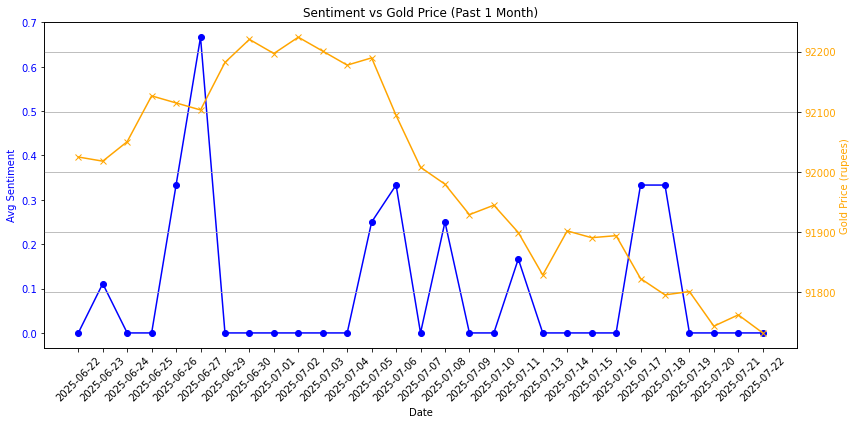

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot sentiment
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Sentiment', color='blue')
ax1.plot(daily_sentiment['date'], daily_sentiment['sentiment'], color='blue', label='Avg Sentiment', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Plot gold price on secondary Y axis
ax2 = ax1.twinx()
ax2.set_ylabel('Gold Price (rupees)', color='orange')
ax2.plot(daily_sentiment['date'], daily_sentiment['gold_price'], color='orange', label='Gold Price', marker='x')
ax2.tick_params(axis='y', labelcolor='orange')

# Final touch
plt.title('Sentiment vs Gold Price (Past 1 Month)')
fig.tight_layout()
plt.grid(True)
plt.show()